In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import csv


cpu_sizes = [0,1,2,4,6,8,12,16,24,32]

show_mean = True
show_med = True


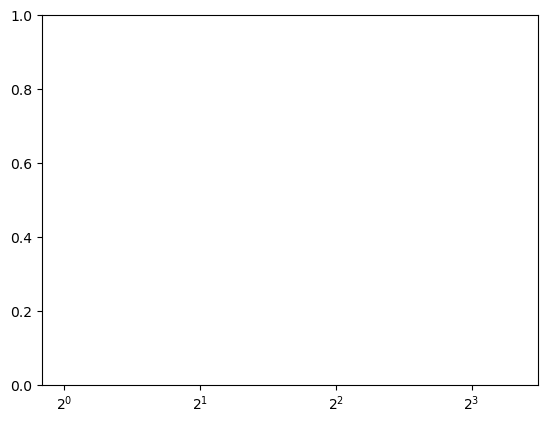

In [297]:
def getMeanData(df,cpu,type):
    #filterd_df = (df [(df ['type'] == type) & (df ['cpu'] == cpu)])
    filterd_df = (df [(df ['cpu'] == cpu) & (df ['iterations'] != 0) & (df ['time'] > 0)])
    mean = filterd_df.mean()
    min = filterd_df.min()
    max = filterd_df.max()
    med = filterd_df.median()
    return (min['time'],mean['time'],max['time'],med['time']),(min['iterations'],mean['iterations'],max['iterations'],med['iterations']) 

def getMeanFailureData(df,cpu,type):
    #filterd_df = (df [(df ['type'] == type) & (df ['cpu'] == cpu)])
    filterd_df = (df [(df ['cpu'] == cpu) & (df ['iterations'] != 0) & (df ['time'] < 0)])
    mean = filterd_df.mean()
    min = filterd_df.min()
    max = filterd_df.max()
    med = filterd_df.median()
    return (min['time'],mean['time'],max['time']),(min['iterations'],mean['iterations'],max['iterations']) 



plt.xscale('log', base=2)


def plot_data(data_mean,data_med,y_label = "",title = ""):
    fig, ax = plt.subplots(figsize=(20, 8))
        # Plot time data
    #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
    if show_mean:
        ax.plot(data_mean[1],data_mean[0], label=str("Średnia"), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
        for i in range(len(data_mean[1])):
            ax.text(data_mean[1][i], data_mean[0][i], f'({data_mean[1][i]}, {data_mean[0][i]:.4})', 
                    fontsize=8, color='green', ha='center', va='bottom', backgroundcolor='white')
    if show_med:
        ax.plot(data_med[1],data_med[0], label=str("Mediana"), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
        for i in range(len(data_med[1])):
            ax.text(data_med[1][i], data_med[0][i], f'({data_med[1][i]}, {data_med[0][i]:.4})', 
                    fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
    #ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot


    # Ustawienie skali logarytmicznej na osi X o podstawie 

    ax.set_xticks(data_mean[1])
    ax.set_title(title)
    ax.set_xlabel('liczba pracujących wątków')
    ax.set_ylabel(y_label)
    ax.legend(['Średnia','Mediana'])

    # for i, label in enumerate(labels):
    #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

    # Plot iterations data


    # Display the plot
    plt.grid()
    plt.tight_layout()
    plt.show()


In [298]:
df_multithread = pd.read_csv("DQN_multithreaded.csv",header=0)
mean_data_for_one_agent_step = []
mean_data_for_failures = []
#mean_data_for_multiple_agent_step = []
for cpu in cpu_sizes:
  mean_data_for_one_agent_step.append((getMeanData(df_multithread,cpu,0),cpu))
  mean_data_for_failures.append((getMeanFailureData(df_multithread,cpu,0),cpu))

print(mean_data_for_one_agent_step)

[(((0.0102406, 20.43048381777778, 302.662, 8.67536), (59.0, 257614.86153846153, 3775275.0, 111905.0)), 0), (((0.00869085, 30.47790722192374, 523.444, 14.4655), (25.0, 239936.4436741768, 4155598.0, 114925.0)), 1), (((0.00912597, 14.388367403474428, 367.895, 4.71741), (27.0, 106442.05467372134, 2715896.0, 34982.0)), 2), (((0.00425623, 9.117342976378092, 400.406, 4.328665), (21.0, 58508.936395759716, 2663701.0, 26351.5)), 4), (((0.00649656, 9.945806483904235, 268.546, 4.27378), (21.0, 37998.02578268877, 1004425.0, 18842.0)), 6), (((0.00723529, 10.466797726925996, 552.973, 4.01425), (30.0, 28537.988614800757, 1516200.0, 11669.0)), 8), (((0.0253786, 6.092588537379576, 109.838, 2.73307), (23.0, 17147.485549132947, 302260.0, 8084.0)), 12), (((0.0095724, 6.092764921633065, 309.298, 2.81266), (18.0, 15019.756048387097, 760122.0, 6938.0)), 16), (((0.00785868, 6.41655085127193, 224.384, 2.94679), (21.0, 10981.41447368421, 384780.0, 4997.5)), 24), (((0.0162217, 5.678221414588236, 93.3336, 3.05065)

# Prezentacja danych na wykresie 2D

* Ilość procesorów równa 0 - algorytm wykorzystuje uczenie sekwencyjne
* Ilość procesorów równa 1 - algorytm wykorzystuje uczenie wielowątkowe dla jednego wątku

### Średni czas uczenia i średnia ilość iteracji 

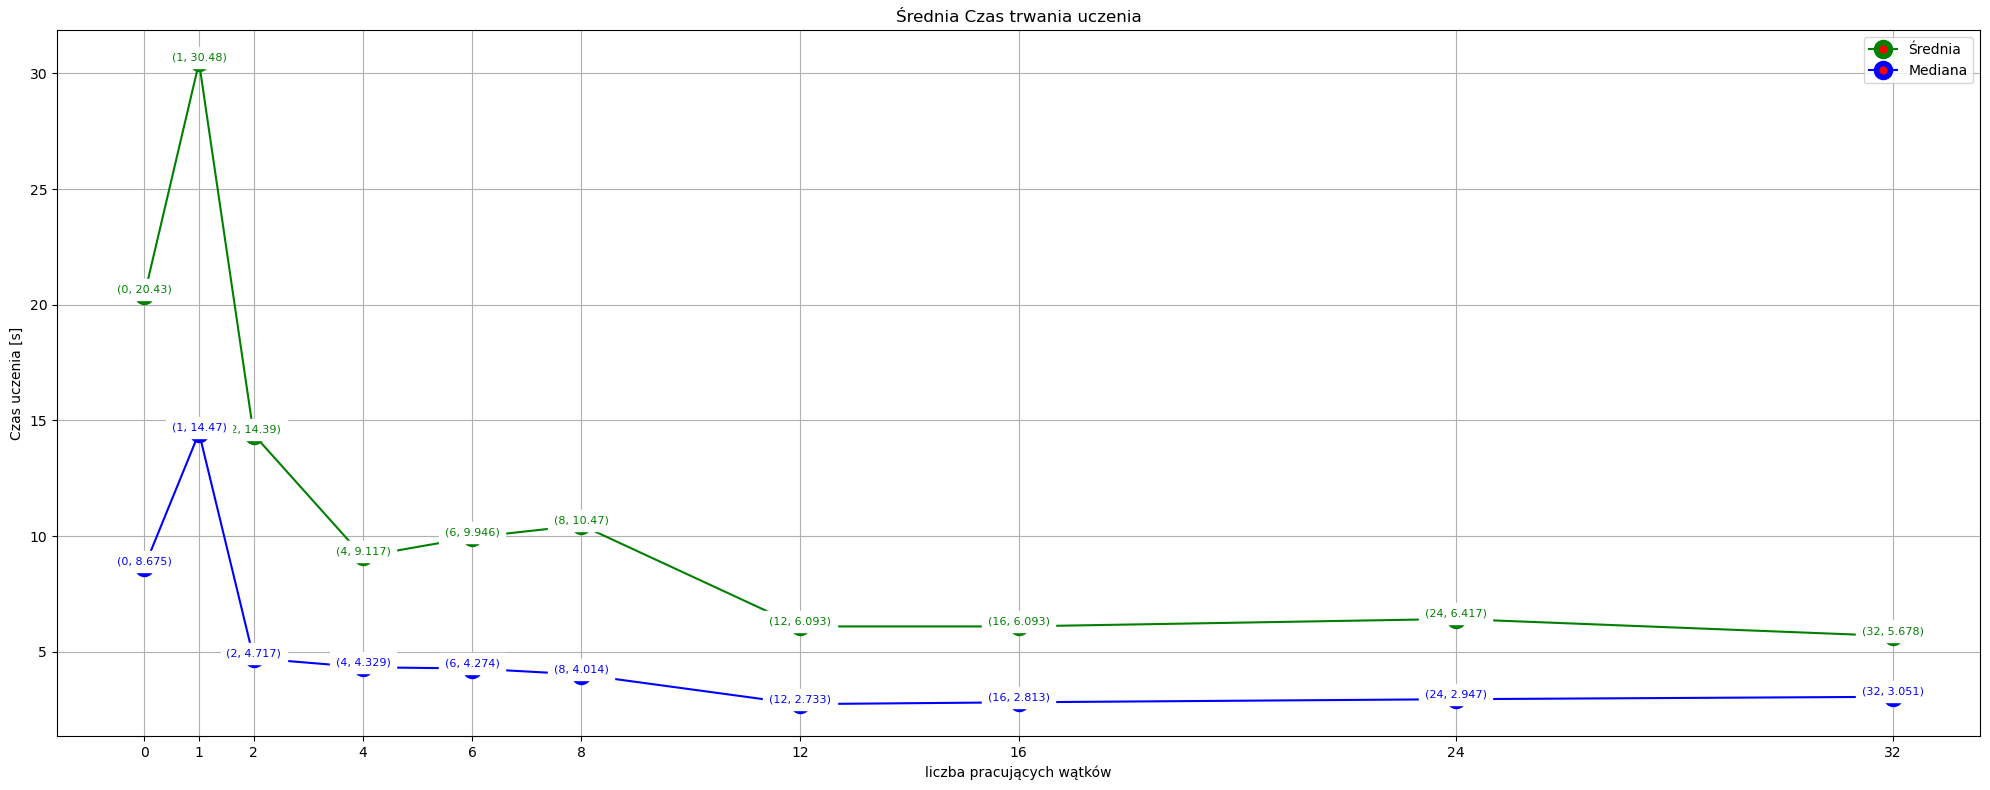

In [299]:
time_min = ([x[0][0][0] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] )  #uncoment for min value plot
time_mean = ([x[0][0][1] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] ) 
time_med = ([x[0][0][3] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] ) 
time_max = ([x[0][0][2] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] )  #uncoment for max value plot


plot_data(time_mean,time_med,"Czas uczenia [s]","Średnia Czas trwania uczenia")

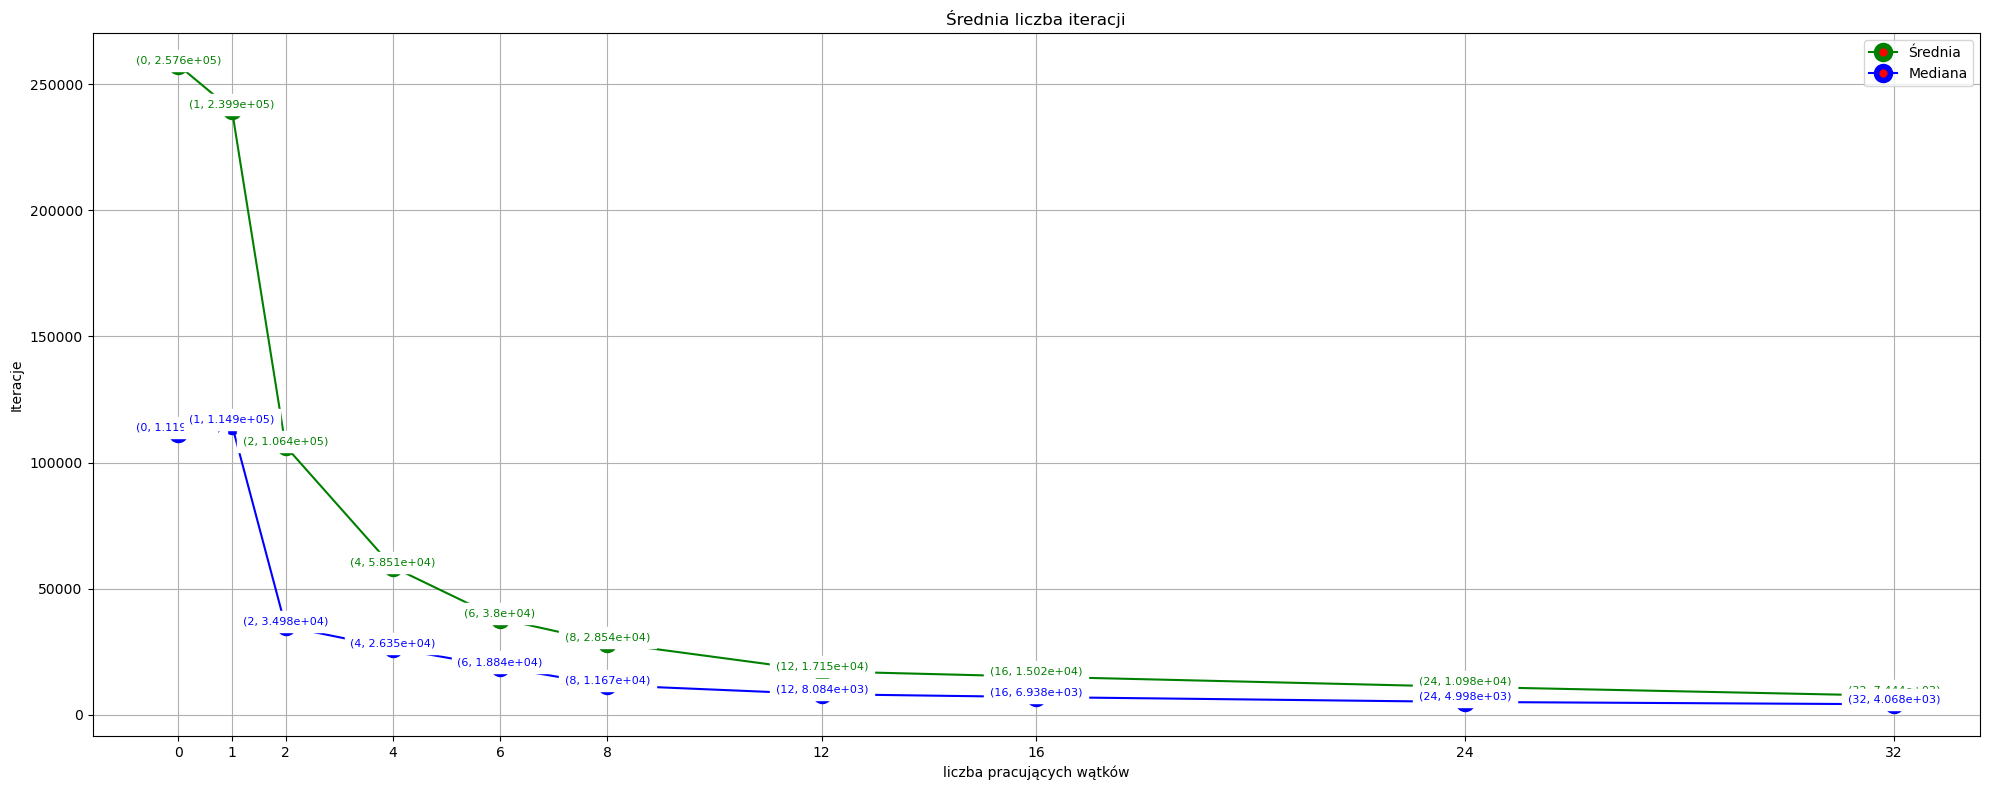

In [300]:
# Time data (min, mean, max)

iter_min = ([x[0][1][0] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] )  #uncoment for min value plot
iter_mean = ([x[0][1][1] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] ) 
iter_med = ([x[0][1][3] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] ) 
iter_max = ([x[0][1][2] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] )  #uncoment for max value plot

plot_data(iter_mean,iter_med,'Iteracje','Średnia liczba iteracji')

# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(iter_mean[1],iter_mean[0], label=str(time_min[0]), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(iter_mean[1][i], iter_mean[0][i] - 1, f'({iter_mean[1][i]}, {iter_mean[0][i]:.4})', 
#                 fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(iter_med[1],iter_med[0], label=str(time_min[0]), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)


# ax.set_xticks(time_mean[1])
# ax.set_title('Średnia liczba iteracji')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Iteracje')
# ax.legend(['Średnia','Mediana'])

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

### Przyśpieszenie i Efektywność silne

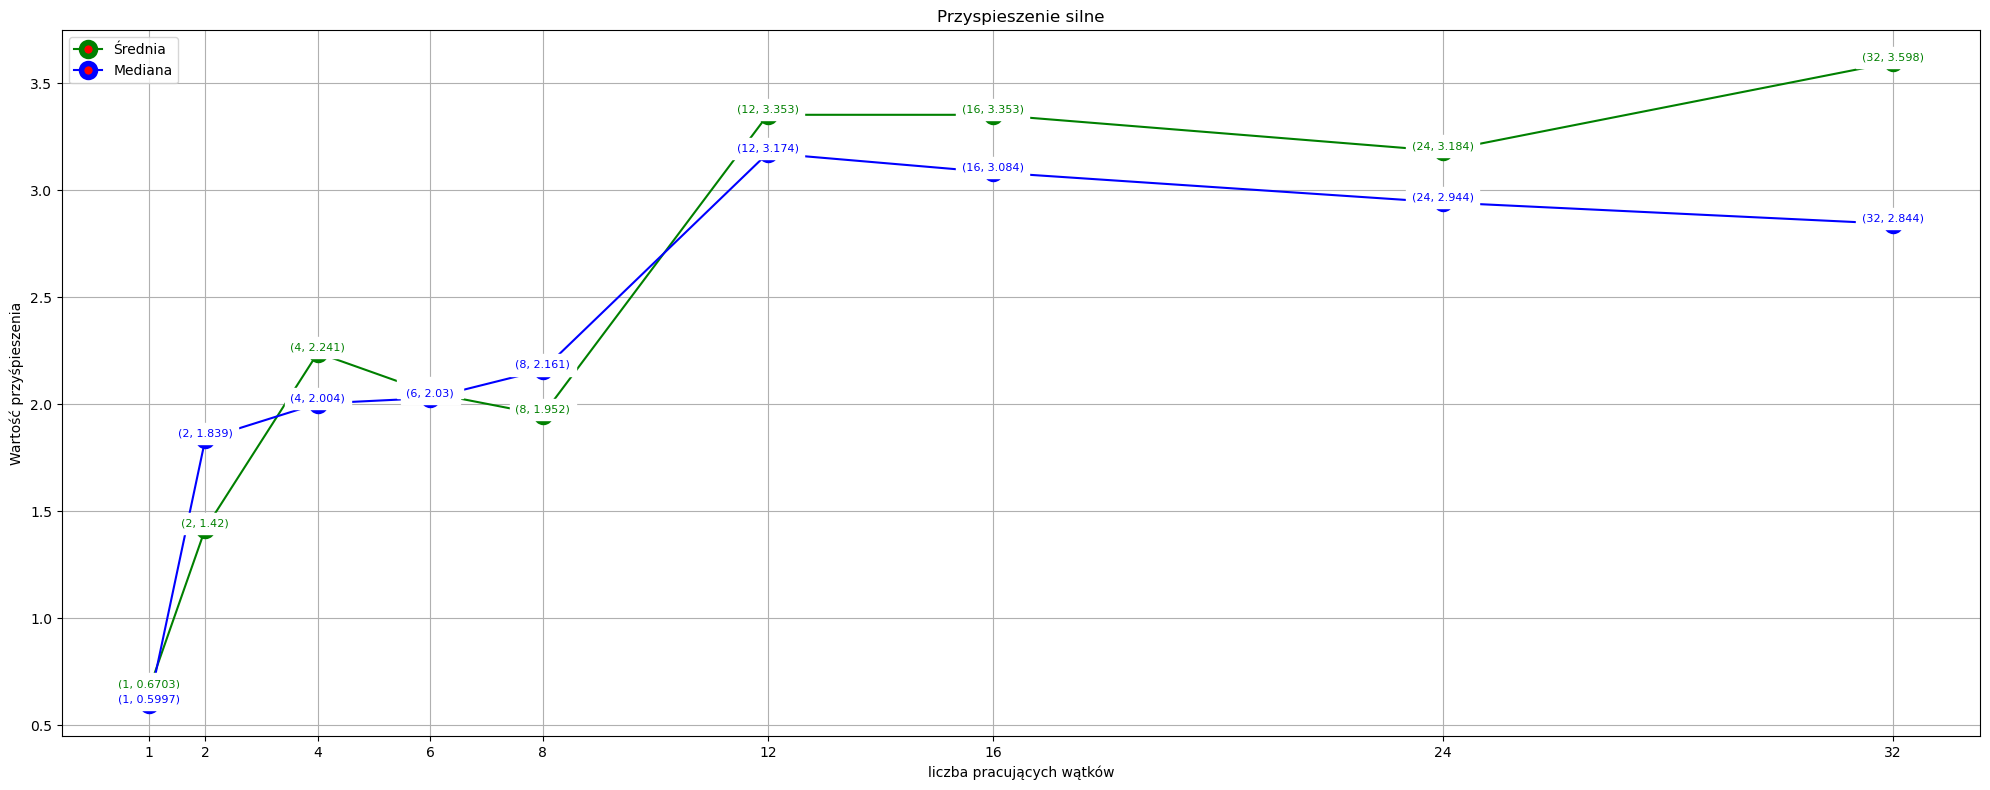

In [301]:
# Time data (min, mean, max)

# fig, ax = plt.subplots(figsize=(20, 8))
# dqn_types = [('blue', 'simple'), ('orange', 'memory'), ('green', 'target'), ('red', 'full')]

time_mean = ([mean_data_for_one_agent_step[0][0][0][1]/x[0][0][1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 
time_med = ([mean_data_for_one_agent_step[0][0][0][3]/x[0][0][3] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 

plot_data(time_mean,time_med,'Wartość przyśpieszenia','Przyspieszenie silne')
# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(time_mean[1],time_mean[0], label=str(time_min[0]), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(time_mean[1][i], time_mean[0][i] - 0.1, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
#                 fontsize=8, color='green', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(time_med[1],time_med[0], label=str(time_med[0]), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
# #ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot


# # Ustawienie skali logarytmicznej na osi X o podstawie 2
# plt.xscale('log', base=2)

# ax.set_xticks(time_mean[1])
# ax.set_title('Przyspieszenie silne')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Wartość przyśpieszenia')
# ax.legend(['Średnia','Mediana'])

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

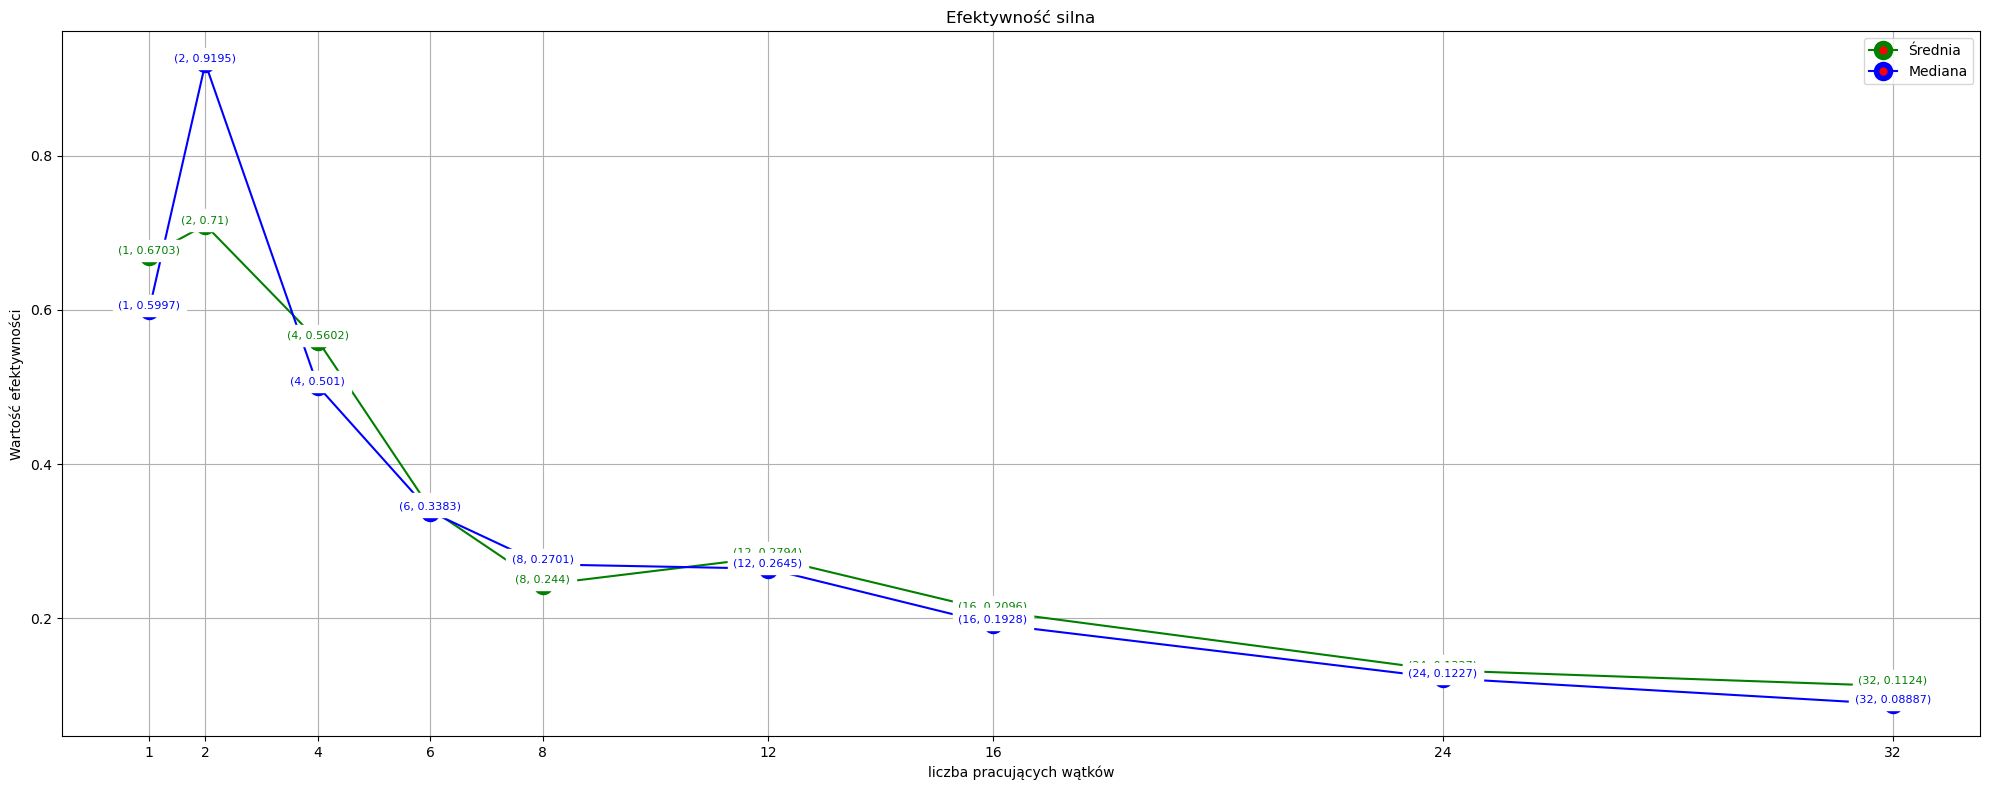

In [302]:
time_mean = ([mean_data_for_one_agent_step[0][0][0][1]/x[0][0][1]/x[1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 
time_med = ([mean_data_for_one_agent_step[0][0][0][3]/x[0][0][3]/x[1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 

plot_data(time_mean,time_med,'Wartość efektywności','Efektywność silna')

# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(time_mean[1],time_mean[0], label="Średnia", color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(time_mean[1][i], time_mean[0][i] - 0.03, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
#                 fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(time_med[1],time_med[0], label="Mediana", color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
# #ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot


# # Ustawienie skali logarytmicznej na osi X o podstawie 2
# plt.xscale('log', base=2)

# ax.set_xticks(time_mean[1])
# ax.set_title('Efektywność silna')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Wartość efektywności')
# ax.legend()

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

### Przyśpieszenie i Efektywność Słabe

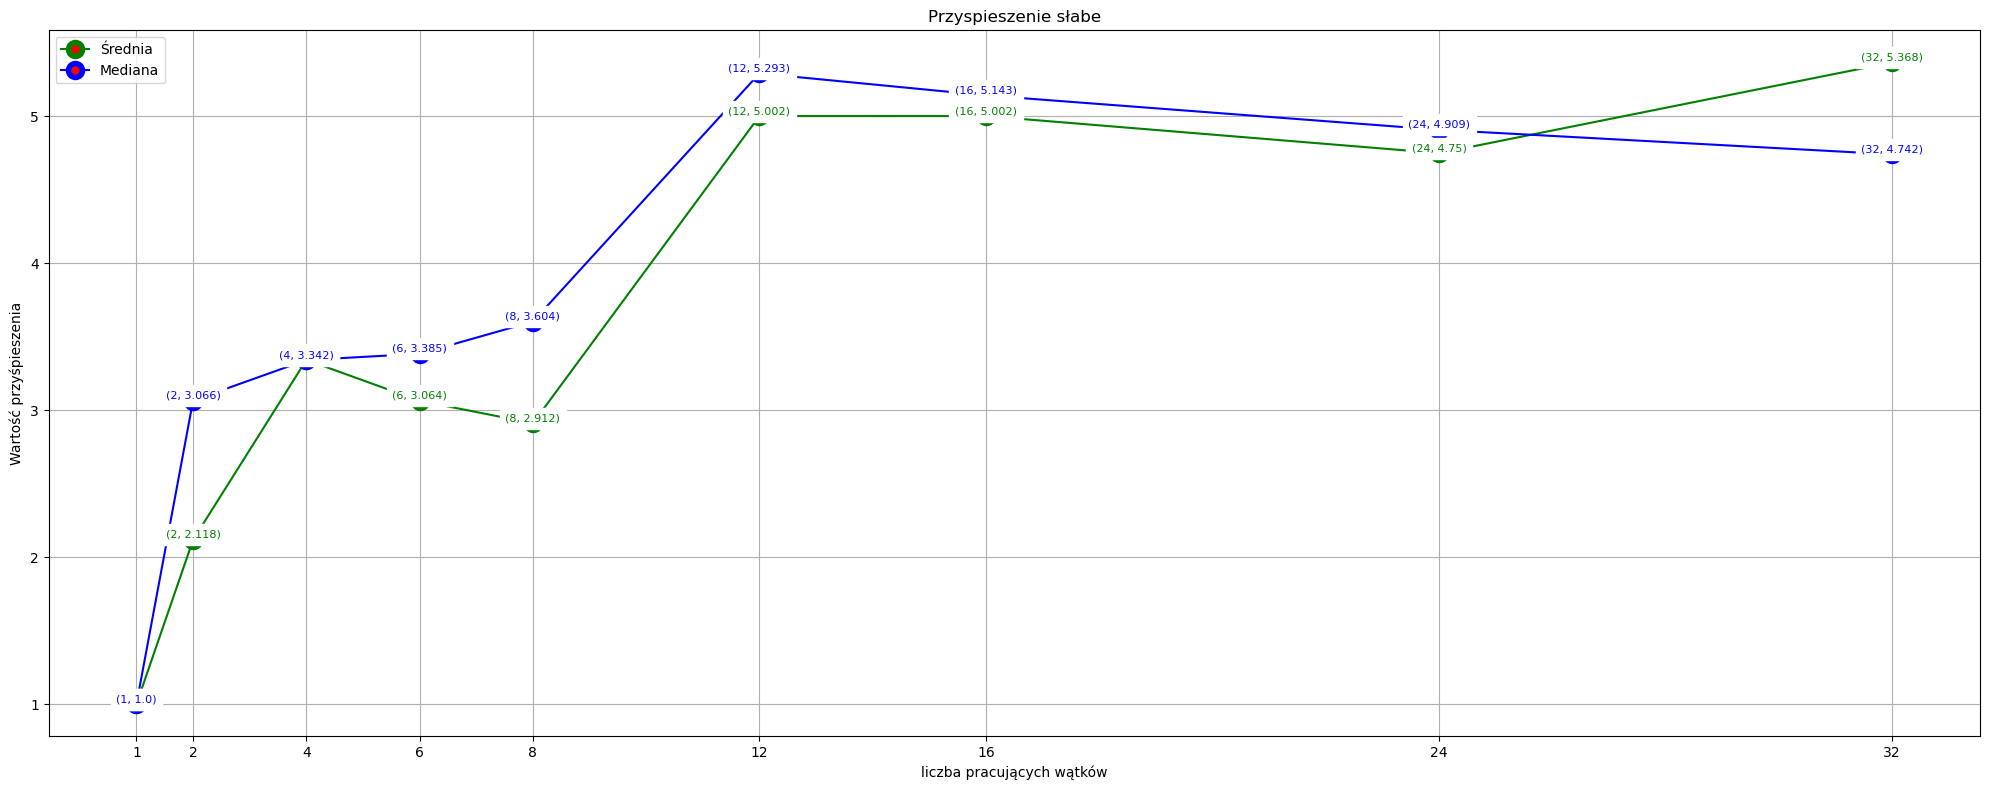

In [303]:
# # Time data (min, mean, max)

# fig, ax = plt.subplots(figsize=(20, 8))
# dqn_types = [('blue', 'simple'), ('orange', 'memory'), ('green', 'target'), ('red', 'full')]

time_mean = ([mean_data_for_one_agent_step[1][0][0][1]/x[0][0][1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 
time_med = ([mean_data_for_one_agent_step[1][0][0][3]/x[0][0][3] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 

plot_data(time_mean,time_med,'Wartość przyśpieszenia','Przyspieszenie słabe')
# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(time_mean[1],time_mean[0], label=str("Średnia"), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(time_mean[1][i], time_mean[0][i] - 0.1, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
#                 fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(time_med[1],time_med[0], label=str("Mediana"), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
# #ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot


# # Ustawienie skali logarytmicznej na osi X o podstawie 2
# plt.xscale('log', base=2)

# ax.set_xticks(time_mean[1])
# ax.set_title('Przyspieszenie słabe')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Wartość przyśpieszenia')
# ax.legend()

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

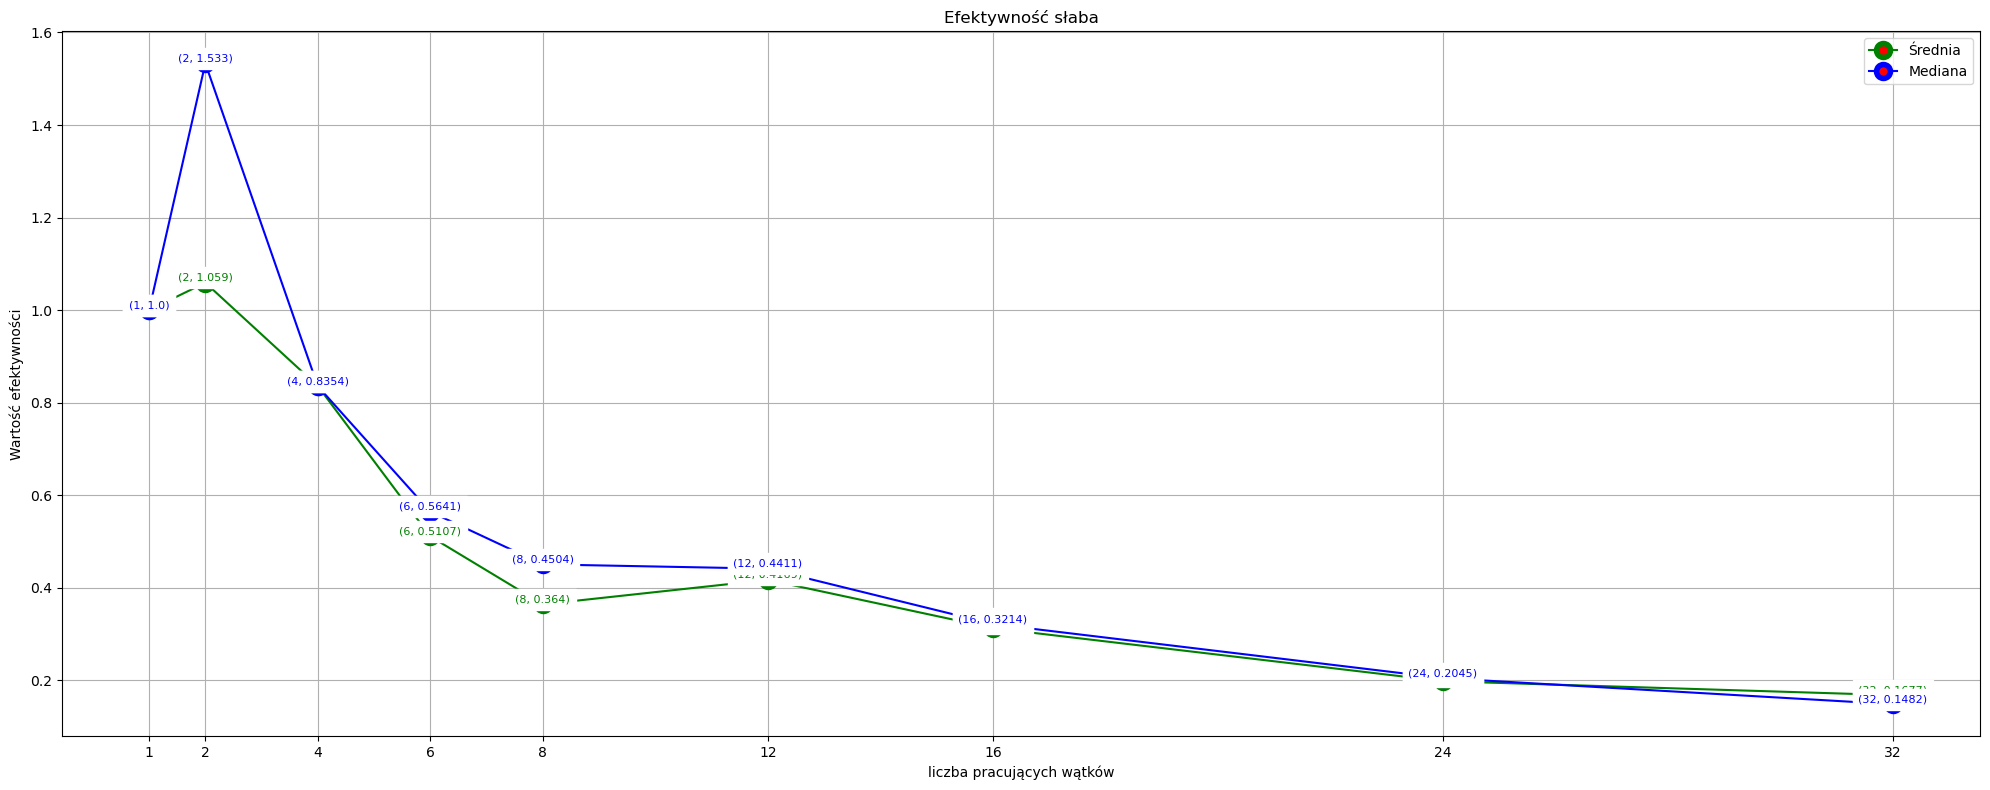

In [304]:
# Time data (min, mean, max)

time_mean = ([mean_data_for_one_agent_step[1][0][0][1]/x[0][0][1]/x[1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 
time_med = ([mean_data_for_one_agent_step[1][0][0][3]/x[0][0][3]/x[1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 

plot_data(time_mean,time_med,'Wartość efektywności','Efektywność słaba')
# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(time_mean[1],time_mean[0], label=str("Średnia"), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(time_mean[1][i], time_mean[0][i] - 0.1, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
#                 fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(time_med[1],time_med[0], label=str("Mediana"), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)


# # Ustawienie skali logarytmicznej na osi X o podstawie 2
# plt.xscale('log', base=2)

# ax.set_xticks(time_mean[1])
# ax.set_title('Efektywność słaba')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Wartość efektywności')
# ax.legend()

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

# Histogram Danych 

[1.39678e+00 2.66852e-01 6.12451e-01 ... 1.92360e+01 7.95221e+01
 2.00216e-02]


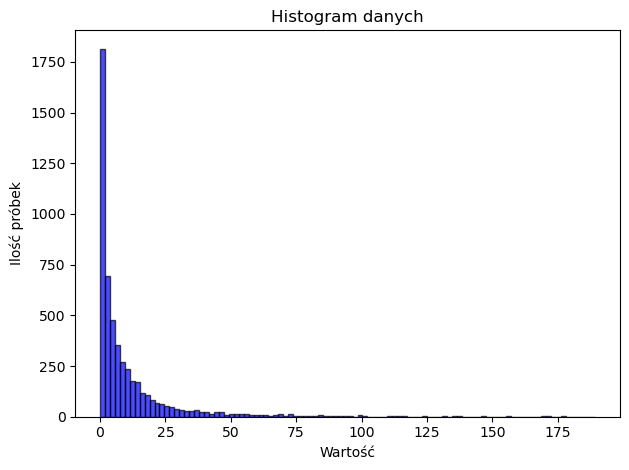

In [305]:
filterd_df = (df_multithread [(df_multithread ['iterations'] != 0) & (df_multithread ['time'] > 0) & (df_multithread ['time'] < 200) ])
print(filterd_df["time"].values)
times_data = filterd_df["time"].values
plt.hist(times_data, bins=100, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Histogram danych')
plt.xlabel('Wartość')
plt.ylabel('Ilość próbek')

# Display the plot
plt.tight_layout()
plt.show()

# Analiza porażek w uczeniu

Poniższe wykresu pokazują ile średnio trwała nieudana próba uczenia. Wykres nie ma głębszej interpretacji.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


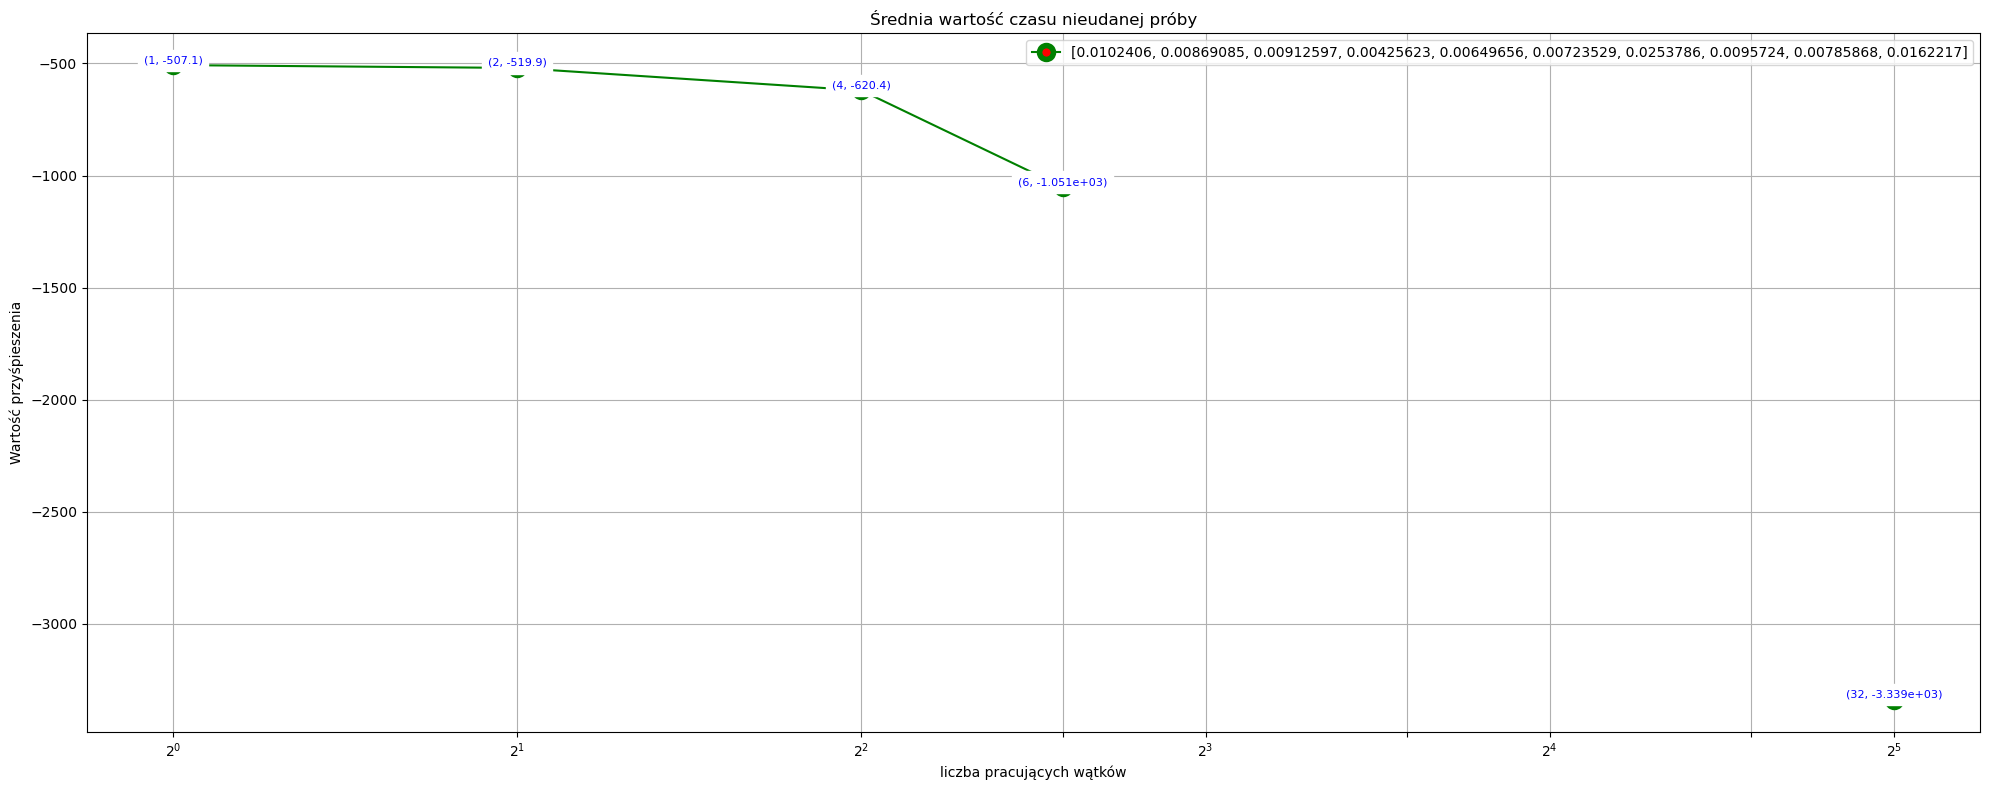

In [306]:
# Time data (min, mean, max)

fig, ax = plt.subplots(figsize=(20, 8))
dqn_types = [('blue', 'simple'), ('orange', 'memory'), ('green', 'target'), ('red', 'full')]

time_mean = ([x[0][0][1] for x in mean_data_for_failures[1:]], [x[1] for x in mean_data_for_failures[1:]] ) 

# Plot time data
#ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
ax.plot(time_mean[1],time_mean[0], label=str(time_min[0]), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot

# Annotating each data point with its value
for i in range(len(time_mean[1])):
    ax.text(time_mean[1][i], time_mean[0][i] - 0.2, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
            fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')

# Ustawienie skali logarytmicznej na osi X o podstawie 2
plt.xscale('log', base=2)

ax.set_xticks(time_mean[1])
ax.set_title('Średnia wartość czasu nieudanej próby')
ax.set_xlabel('liczba pracujących wątków')
ax.set_ylabel('Wartość przyśpieszenia')
ax.legend()

# for i, label in enumerate(labels):
#     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# Plot iterations data


# Display the plot
plt.grid()
plt.tight_layout()
plt.show()

Histogram czasów porażek

We wszystkich danych, nieudanych próbek wyszło: 31 / 5578 wszystkich próbek


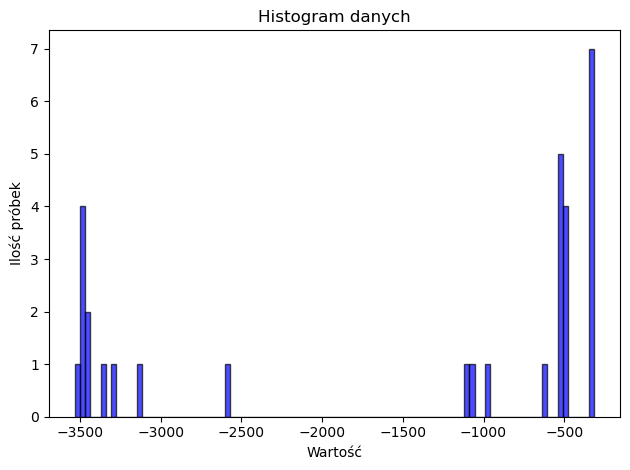

In [307]:
filterd_df = (df_multithread [(df_multithread ['iterations'] != 0) & (df_multithread ['time'] < 0) ])
print("We wszystkich danych, nieudanych próbek wyszło:",len(filterd_df.values),"/",len(df_multithread.values),"wszystkich próbek" )
times_data = filterd_df["time"].values
plt.hist(times_data, bins=100, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Histogram danych')
plt.xlabel('Wartość')
plt.ylabel('Ilość próbek')

# Display the plot
plt.tight_layout()
plt.show()